In [39]:
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import math

#Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics

# Import dataset
import statsmodels.api as sm


showing manual logistic function using numpy and matplotlib

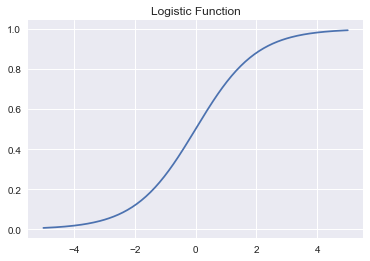

In [40]:
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0) * t))

# set t from -5 to 5 and 200 elements
t = np.linspace(-5,5,200)

# set y using list comprehsion
y = np.array([logistic(e) for e in t])

plt.plot(t,y)
plt.title('Logistic Function')


Lets analyse the dataset "Theory of Extramarital Affairs".  
import it using the statsmodel package

In [41]:
affair_df = sm.datasets.fair.load_pandas().data

In [42]:
affair_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


From the above table the columns are  :  

rate_marriage : 1 = very poor , 2 = poor , 3 = fair , 4 = good , 5 = very good  

children : Number of children  

Yrs_married : Number of years married  

religious : How religious 1 = Not , 2 = midly , 3 = fairly , 4 = strongly  

educ : level of education 9 = grade school , 12 = high school , 14 = some college , 16 = Graduate , 17 = graduate school, 20 = 
advanced degree

occupation : 1 = low level like student , 2 = farming , semi skilled or something like that , 3 = white collar , 4 = teacher ,artists   ,writers , 5 = administrative , 6 = proffesional 

affairs : measure of time spent in extramarital affairs

In [43]:
def check_affair(x):
    if x!=0:
       return 1
    else:
       return 0
affair_df['Has_affair'] = affair_df['affairs'].apply(check_affair)
affair_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Has_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [44]:
affair_df.groupby('Has_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Has_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Represent the Age vs Has_affair graphically using seaborn

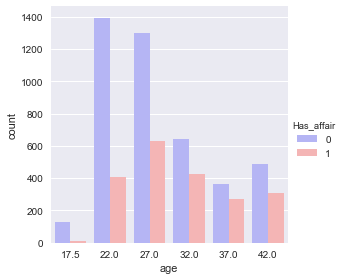

In [45]:
sns.factorplot('age',data=affair_df,hue='Has_affair',kind='count',palette='bwr')

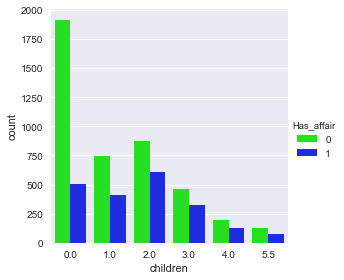

In [46]:
sns.factorplot('children',data=affair_df,hue='Has_affair',kind='count',palette='hsv')

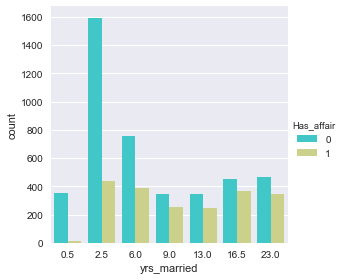

In [47]:
sns.factorplot('yrs_married',data=affair_df,hue='Has_affair',kind='count',palette='rainbow')

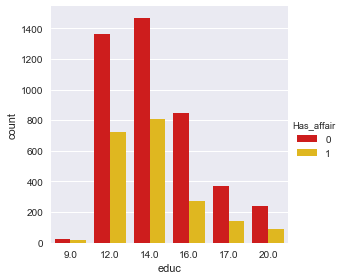

In [48]:
sns.factorplot('educ',data=affair_df,hue='Has_affair',kind='count',palette='hot')

In [49]:
affair_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Has_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


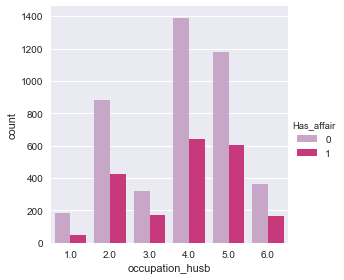

In [50]:
sns.factorplot('occupation_husb',data=affair_df,hue='Has_affair',kind='count',palette='PuRd')

# Create dummy data
2 columns are unlike others  "Ocupation" and "occupation_husb"  
These columns are in a format known as CATAGORICAL VARIABLES  
That means there is no 1.5 or 2.5 etc in between 1-2  or 2-3  
These are separate variables

In [51]:
# Pandas has built-in features to extract dummy data from real data
occ_dummies = pd.get_dummies(affair_df['occupation'])
hus_occ_dummies = pd.get_dummies(affair_df['occupation_husb'])
hus_occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [52]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

hus_occ_dummies.head()

,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [53]:
X = affair_df.drop(['occupation','occupation_husb','Has_affair'],axis=1)


In [54]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [55]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [56]:
X = pd.concat([X,dummies],axis=1)

In [58]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [59]:
Y = affair_df['Has_affair']

In [60]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Has_affair, dtype: int64

# Multicolinearity Consideration  
we need to drop the occ1 and hocc1 column to avoid the multicolinearity.  
Multicolinearity occurs due to dummy variables we created.  
Dummy vars are highly correlated and our model begin to start distorted because one of the dummy var. can be prdeicted from the  
others.  
So by dropping a column we can avoid this.

In [62]:
X = X.drop(['occ1','hocc1','affairs'],axis=1)

In [63]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [65]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [66]:
log_reg = LogisticRegression()
log_reg.fit(X,Y)
log_reg.score(X,Y)

0.7260446120012567

In [67]:
Y.mean()

0.32249450204209867

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
log_Mode = LogisticRegression()
log_Mode.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
prdict_ = log_Mode.predict(X_test)

In [71]:
metrics.accuracy_score(Y_test,prdict_)

0.70414572864321612